In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
from scipy import stats


In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<AxesSubplot:xlabel='day', ylabel='total_bill'>

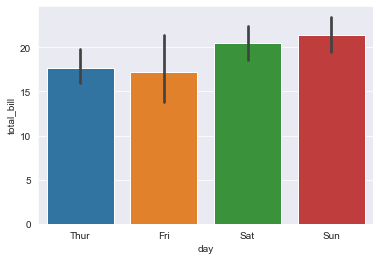

In [21]:
sns.barplot(x="day" , y="total_bill", data=tips, ci=95)

In [22]:
##veri çubuğunun alt ve üstünü ortalaması , standart sapması hesaplama

In [24]:
tips[tips["day"] == "Fri"]["total_bill"].mean()

17.151578947368417

In [25]:
xbar = tips[tips["day"] == "Fri"]["total_bill"].mean()
xbar

17.151578947368417

In [26]:
s = tips[tips["day"] == "Fri"]["total_bill"].std()   ### standart sapması hesaplama
s

8.302659723217143

In [ ]:
### ortalama standart hatası nasıl bulunur

In [27]:
tips[tips["day"] == "Fri"]["total_bill"].std() / np.sqrt(len(tips[tips["day"] == "Fri"]["total_bill"]))

1.904760773479416

In [28]:
sem = tips[tips["day"] == "Fri"]["total_bill"].sem()   ### standart hatası nasıl bulunur
sem


1.904760773479416

In [29]:
moe = 1.96 * sem
moe                               ### hata marjı

3.7333311160196554

In [30]:
lower_limit = xbar - moe    ### yada
lower_limit

13.418247831348761

In [31]:
upper_limit = xbar + moe   ## yada 
upper_limit

20.884910063388073

In [33]:
stats.norm.interval(0.95, loc=xbar, scale=sem)  # tek kod ile bu şekilde

(13.418316432184106, 20.88484146255273)

In [34]:
n = len(tips[tips["day"] == "Fri"]["total_bill"])
n

19

In [42]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=sem)    ### en doğru hesaplama t  dağılımını kulanmak GÜVEN ARALIĞI HESAP

(13.149825056979093, 21.15333283775774)

In [ ]:
### Relevant dataset  (uygun dataset i seçtik)
###mean   (ortalamasını baktık)
##standart error of the mean ( std  hatasına baktık)
## degrees of freedom ( sem baktık)
## confidence interval code from scipy 

In [ ]:
### saturday güven aralığını hesaplayalım

In [43]:
tips[tips["day"] == "Sat"]["total_bill"].mean()

20.441379310344825

In [44]:
xbar = tips[tips["day"] == "Sat"]["total_bill"].mean()    ## 1 .sutun ortalama
xbar

20.441379310344825

In [45]:
tips[tips["day"] == "Sat"]["total_bill"].std() / np.sqrt(len(tips[tips["day"] == "Sat"]["total_bill"]))

1.016407566061897

In [46]:
sem = tips[tips["day"] == "Sat"]["total_bill"].sem()   ### standart hatası nasıl bulunur   2. sutun hata
sem

1.016407566061897

In [47]:
stats.norm.interval(0.95, loc=xbar, scale=sem)

(18.449257087249492, 22.433501533440158)

In [48]:
n = len(tips[tips["day"] == "Sat"]["total_bill"])   #### n 3.satır 
n

87

In [49]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=sem)     #### 3.satır ( en doğrusu t dağılımı)

(18.420827942450163, 22.461930678239487)

In [52]:
stats.norm.interval(0.95, xbar , sem)   ### 30 dan sonra norm kullanılıyor..

(18.449257087249492, 22.433501533440158)